# Trump's Approval Rating and The Stock Market 

![](https://forex-images.mt5.com/humor/source/mt5/img5a4cb01055031.png)
*www.mt5.com*

In [1]:
# Python Data Analysis Imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200) # Display up to 120 columns of a dataframe

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import trumps approval ratings. We used the [fivethirtyeight github repo for trump-approval-ratings](https://github.com/fivethirtyeight/data/tree/master/trump-approval-ratings). You can also find a great dashboard here on https://projects.fivethirtyeight.com/trump-approval-ratings/

In [2]:
rating = pd.read_csv("./approval_polllist.csv")
rating.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,11/16/2018,1/20/2017,1/22/2017,Morning Consult,B-,1992.0,rv,0.946437,0.0,46.0,37.0,42.95969,39.20849,NaN,NaN,http://www.politico.com/story/2017/01/poll-vot...,49249,77261,1/23/2017,17:44:57 16 Nov 2018
1,Donald Trump,All polls,11/16/2018,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.245429,0.0,45.0,45.0,46.08260,43.28871,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,17:44:57 16 Nov 2018
2,Donald Trump,All polls,11/16/2018,1/20/2017,1/24/2017,Ipsos,B+,1632.0,a,0.224456,0.0,42.1,45.2,42.52667,44.05646,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,17:44:57 16 Nov 2018
3,Donald Trump,All polls,11/16/2018,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.226788,0.0,45.0,46.0,46.08260,44.28871,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,17:44:57 16 Nov 2018
4,Donald Trump,All polls,11/16/2018,1/20/2017,1/25/2017,Quinnipiac University,A-,1190.0,rv,1.644662,0.0,36.0,44.0,37.71518,42.59451,NaN,NaN,https://poll.qu.edu/national/release-detail?Re...,49260,77272,1/26/2017,17:44:57 16 Nov 2018


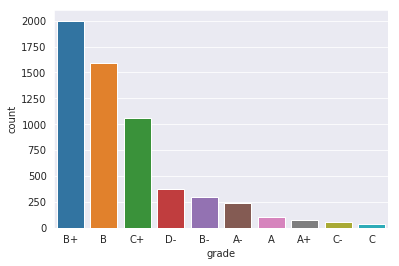

In [3]:
sns.countplot(x = 'grade', 
              data = rating, 
              order = rating['grade'].value_counts().index)

In [4]:
topline = pd.read_csv("./approval_topline.csv")
topline['date'] = pd.to_datetime(topline.modeldate)   # convert modeldate into a data time 
topline['date'] = topline.date.apply(lambda x: x.date())
topline.head()

,president,subgroup,modeldate,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,timestamp,date
0,Donald Trump,Voters,11/16/2018,43.56310,47.53812,39.58807,52.51929,56.58352,48.45506,17:45:56 16 Nov 2018,2018-11-16
1,Donald Trump,Adults,11/16/2018,41.73164,45.02438,38.43890,53.75866,58.26497,49.25236,17:45:23 16 Nov 2018,2018-11-16
2,Donald Trump,All polls,11/16/2018,42.45884,46.88390,38.03379,53.04454,57.37421,48.71488,17:44:57 16 Nov 2018,2018-11-16
3,Donald Trump,All polls,11/15/2018,42.42001,46.76006,38.07996,53.02117,57.32919,48.71315,16:01:02 15 Nov 2018,2018-11-15
4,Donald Trump,Adults,11/15/2018,41.75514,45.04311,38.46717,53.69690,58.17951,49.21428,16:01:26 15 Nov 2018,2018-11-15


Plot approval rating

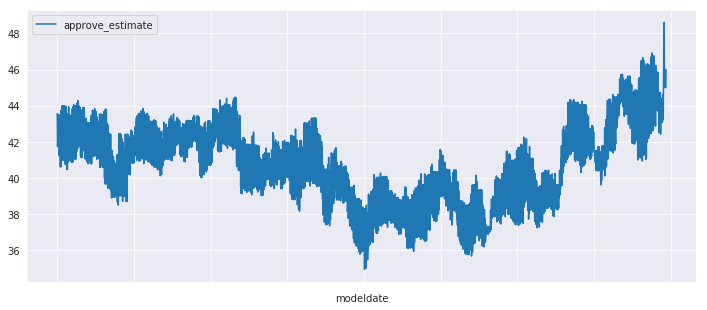

In [33]:
f,ax = plt.subplots(1,1,figsize=(12,5))
topline.plot.line(x='modeldate',y='approve_estimate',ax=ax)

In [6]:
topline.date.describe()

count           1986
unique           662
top       2018-05-23
freq               3
Name: date, dtype: object

Trumps inauguration date was January 20, 2017, however the earliest poll that fivethirtyeight was able to gether was 1/23/2017. We work with what we can work with

In [7]:
topline.date.min()

datetime.date(2017, 1, 23)

## S&P500

Using S&P500 data from [Yahoo Finance](https://finance.yahoo.com/quote/%5EGSPC/history/)

working with stock market data in py [info](https://www.johnwittenauer.net/a-simple-time-series-analysis-of-the-sp-500-index/)

In [8]:
stocks = pd.read_csv("./sp500_11172018.csv")

# order and srot the date and then set the index to the date column
stocks['Date'] = stocks.Date.convert_objects(convert_dates='coerce')
stocks = stocks.sort_index(by="Date")
stocks = stocks.set_index("Date")
stocks.head()

/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.
/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-23,2267.780029,2271.780029,2257.020020,2265.199951,2265.199951,3152710000
2017-01-24,2267.879883,2284.629883,2266.679932,2280.070068,2280.070068,3810960000
2017-01-25,2288.879883,2299.550049,2288.879883,2298.370117,2298.370117,3846020000
2017-01-26,2298.629883,2300.989990,2294.080078,2296.679932,2296.679932,3610360000
2017-01-27,2299.020020,2299.020020,2291.620117,2294.689941,2294.689941,3135890000


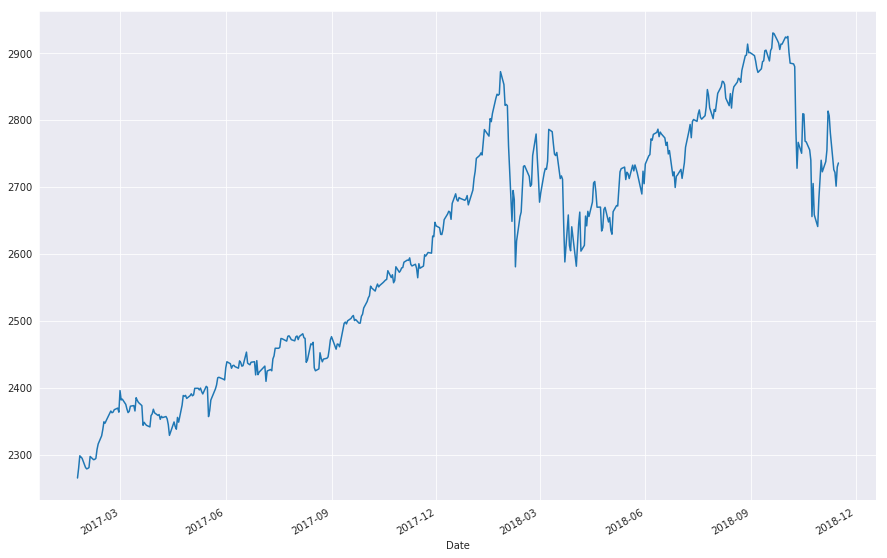

In [9]:
stocks.Close.plot(figsize = (15,10))

Some of the initally obvious things to note this the apparent volidility. Its difficult to pinpoint exactly what causes the volidility, however we are going to analysis trumps activity in accordance to the stock market. Typically the volitility in stock market is due to human emotion. For the most part we all have the same market information, however, it can make one to purchase and the other to see. 

In [10]:
stocks.index.min()

Timestamp('2017-01-23 00:00:00')

## Sentiment Analysis @realdonaldtrump

Data Source: [Trump Twitter Archive](http://www.trumptwitterarchive.com/archive)

In [11]:
tweets = pd.read_csv("./trump_tweets.csv")
tweets.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Thank you @JerryBrownGov. Look forward to join...,11-17-2018 03:14:02,8007,34153,False,1063631319739953152
1,Twitter for iPhone,....their country’s flag. Can this be possible...,11-17-2018 00:43:36,20000,80153,False,1063593459695669254
2,Twitter for iPhone,Isn’t it ironic that large Caravans of people ...,11-17-2018 00:43:35,22574,84201,False,1063593456579354624
3,Twitter for iPhone,Congratulations to Brian Kemp on becoming the ...,11-17-2018 00:37:46,16007,79444,False,1063591994738515968
4,Twitter for iPhone,Congratulations to Ron DeSantis on becoming th...,11-17-2018 00:36:44,18020,80579,False,1063591735169871872


### Text Cleaning

In [12]:

import re

def preprocess_post(post):
    post = str(post)
    #post = html.unescape(post)
    post = re.sub(r"http.?://[^\s]+[\s]?", '',post)
    post = ''.join(c for c in post if not c.isdigit())
    post = post.lower()
    post = re.sub('\n', ' ', post)
    post = re.sub(r'[^\w\s]','',post)
    
    
    return post

In [13]:
tweets = tweets[~tweets.text.isnull()].reset_index(drop=True)
tweets['text'] = pd.DataFrame(tweets.text.map(lambda x: preprocess_post(x)))


### Sentiment Analysis
One of the ways to perform to understand the 'tone' of the text of the tweet is to analyse the specific word usage and the sentiment associated with those words. With sentiment analysis we are able to measure the tone and gauge the positivity or negativity of the tweet. For right now we will just return the sentiment results as: 0 for neural, 1 positive, -1 and negative.

In [14]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def news_sentiment(tweet):
    sentiments = []
    
    sid = SentimentIntensityAnalyzer()
    for article in tweet['text']:
        ss = sid.polarity_scores(article)
        sentiments.append(ss)    
    
    sentiments = pd.DataFrame(sentiments)
    # print high level statistics
    print('high level statistics from the news_sentiment articles analysis of all teams: /n')
    print(sentiments.describe())
    tweet_sent = pd.concat([tweet, sentiments], axis = 1)
    return tweet_sent

tweets = news_sentiment(tweets)

/home/redne/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


high level statistics from the news_sentiment articles analysis of all teams: /n
          compound          neg          neu          pos
count  5454.000000  5454.000000  5454.000000  5454.000000
mean      0.203735     0.082425     0.731807     0.175680
std       0.573584     0.107146     0.174179     0.160592
min      -0.996000     0.000000     0.000000     0.000000
25%      -0.202900     0.000000     0.635000     0.030000
50%       0.318200     0.032000     0.737000     0.151000
75%       0.726900     0.144000     0.843000     0.267000
max       0.989500     1.000000     1.000000     1.000000


In [15]:
# order and srot the date and then set the index to the date column
tweets['Date'] = tweets.created_at.convert_objects(convert_dates='coerce')
tweets['date'] = tweets.Date.apply(lambda x: x.date())
tweets = tweets.sort_index(by="Date")
tweets = tweets.set_index("Date")

/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  after removing the cwd from sys.path.


In [16]:
tweets.columns

Index(['source', 'text', 'created_at', 'retweet_count', 'favorite_count',
       'is_retweet', 'id_str', 'compound', 'neg', 'neu', 'pos', 'date'],
      dtype='object')

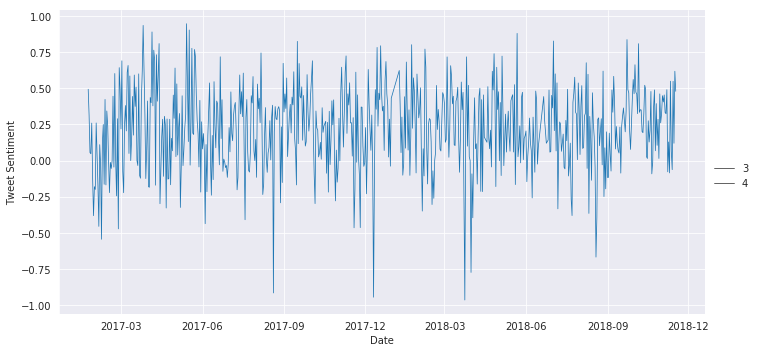

In [17]:
ax = sns.relplot(x="date", y="compound", kind="line", ci=None, data=tweets, size=4, aspect = 2)
ax.set(xlabel='Date', ylabel = 'Tweet Sentiment')

In [18]:
tweets.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,compound,neg,neu,pos,date
Date,,,,,,,,,,,,
2017-01-23 11:38:16,Twitter for Android,busy week planned with a heavy focus on jobs a...,01-23-2017 11:38:16,26750,177839,False,823495059010109440,0.4939,0.0,0.826,0.174,2017-01-23
2017-01-24 11:11:47,Twitter for Android,will be meeting at with top automobile execut...,01-24-2017 11:11:47,23743,154857,False,823850781946343427,0.2732,0.0,0.871,0.129,2017-01-24
2017-01-24 16:58:06,Twitter for iPhone,a photo delivered yesterday that will be displ...,01-24-2017 16:58:06,20939,109406,False,823937936056008704,0.3612,0.0,0.848,0.152,2017-01-24
2017-01-24 17:04:01,Twitter for iPhone,great meeting with automobile industry leaders...,01-24-2017 17:04:01,16331,99607,False,823939422743830528,0.6249,0.0,0.773,0.227,2017-01-24
2017-01-24 17:49:17,Twitter for iPhone,signing orders to move forward with the constr...,01-24-2017 17:49:17,25694,131943,False,823950814163140609,0.0000,0.0,1.000,0.000,2017-01-24


/home/redne/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


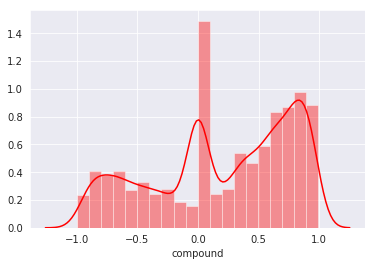

In [28]:
sns.distplot(df['compound'], bins=20, color='red')

(0, 1.0620317279452394)

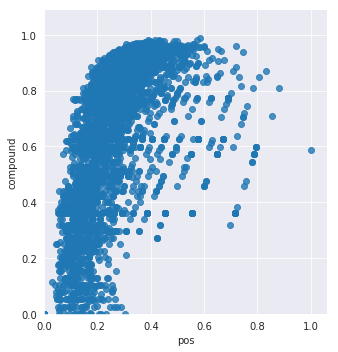

In [23]:
sns.lmplot(x='pos', y='compound', data=tweets,
           fit_reg=False)
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

## Twitter Analysis with the Stock Market

![](https://thenib.imgix.net/usq/f1522719-2cd3-4ea9-93a8-09c33753f5f6/the-president-has-nothing-to-do-with-the-stock-market-tout-858.jpeg?auto=compress,format&cs=srgb&_=858ba58fc265e9060dd3b353ecc18f7e)

Now that we have the data lets start performing some high level analysis. First off lets see how Trumps Sentiments on Twitter overalys on the market. 

In [20]:
df = pd.merge(topline[['date', 'approve_estimate', 'disapprove_estimate']],tweets[['date', 'compound']], on='date')
df.head()

,date,approve_estimate,disapprove_estimate,compound
0,2018-11-16,43.56310,52.51929,0.3612
1,2018-11-16,43.56310,52.51929,0.9442
2,2018-11-16,43.56310,52.51929,0.3612
3,2018-11-16,43.56310,52.51929,0.8074
4,2018-11-16,41.73164,53.75866,0.3612


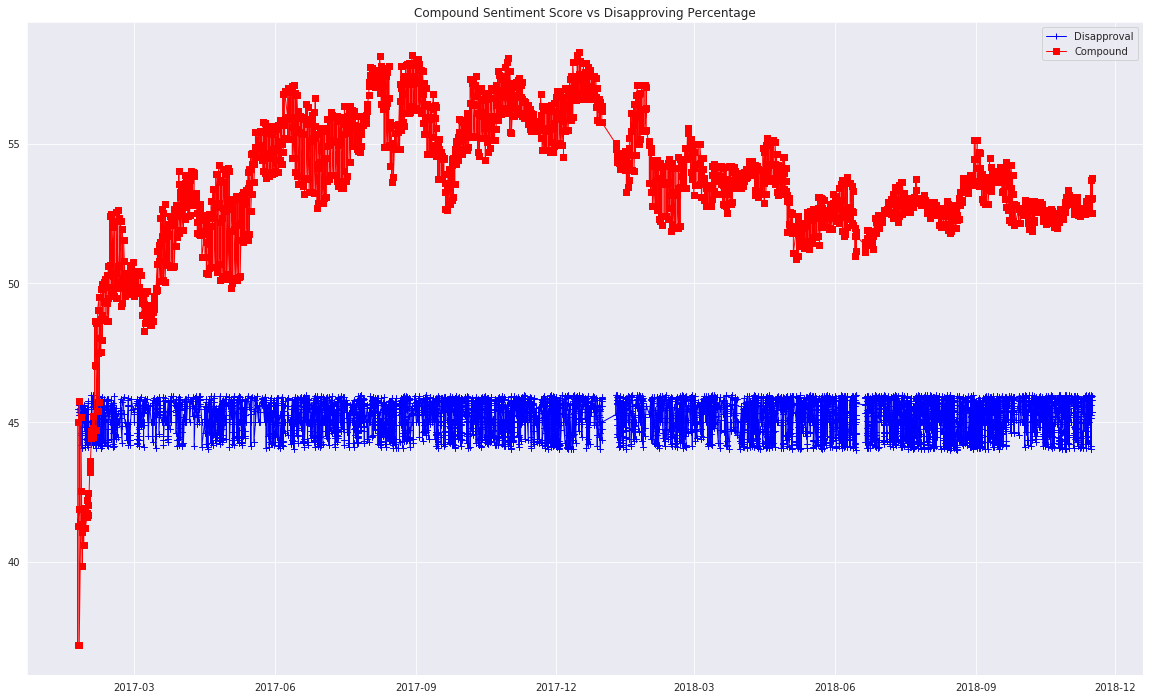

In [25]:
plt.figure(figsize=(20,12))
x_axis = df['date']
# Create a handle for each plot
Compound = plt.plot(x_axis, df['compound']+45, marker="+",color="blue", linewidth=1, label="Sentiment")
Approve = plt.plot(x_axis, df['disapprove_estimate'], marker="s", color="Red", linewidth=1, label="Disapprove")

plt.legend((Compound[0], Approve[0]),('Disapproval', 'Compound'))
plt.title('Compound Sentiment Score vs Disapproving Percentage')
plt.show()

Text(0,0.5,'Mean sentiment')

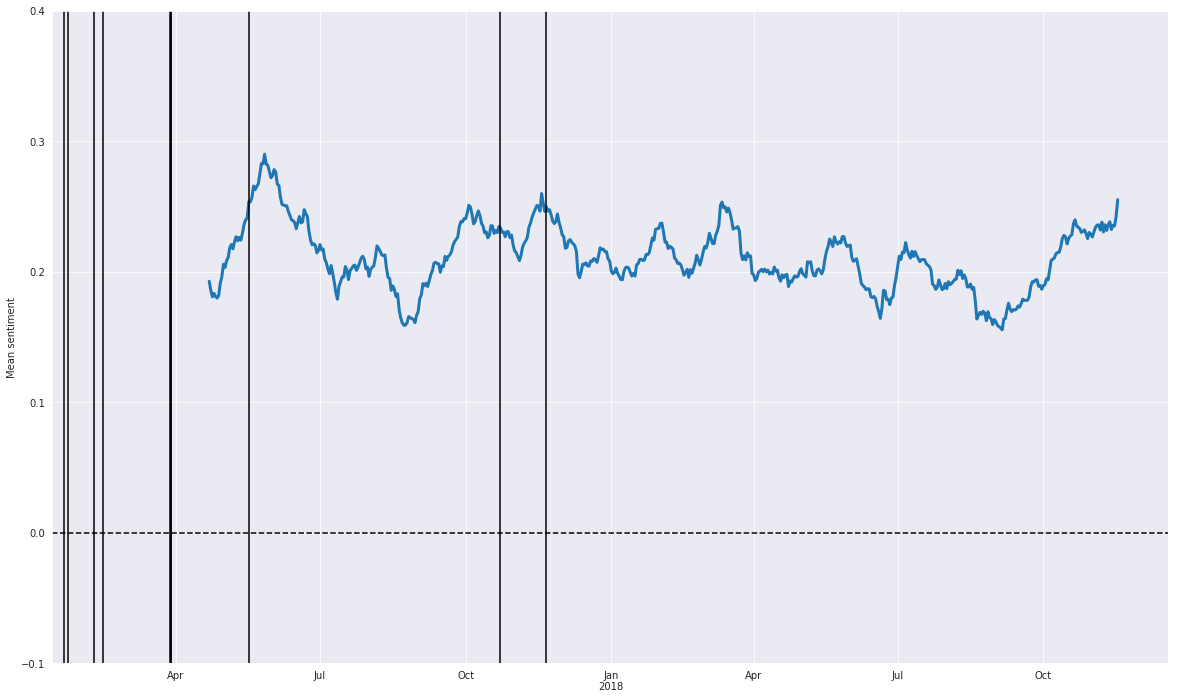

In [38]:
tweets.groupby('date').agg({'compound':np.mean})['compound']

tweets_sentiment = tweets.groupby('date').agg({'compound':np.mean})['compound']
tweets_sentiment = tweets_sentiment.reindex(pd.date_range(tweets_sentiment.index.min(),tweets_sentiment.index.max()),fill_value=0)

f,ax = plt.subplots(1,1,figsize=(20,12))

tweets_sentiment.rolling(90).mean().plot(ax=ax,lw=3)

ax.set_ylim((-.1,.4))
ax.axhline(y=0,c='k',ls='--')
ax.axvline(x=pd.Timestamp('2017-05-17'),c='k') # Special Investigator appointed
ax.axvline(x=pd.Timestamp('2017-03-29'),c='k') # 
ax.axvline(x=pd.Timestamp('2017-11-21'),c='k') # Trump Administration Announces Sanction s Against North Korea
ax.axvline(x=pd.Timestamp('2017-10-23'),c='k') # Trump UIrges House GOP to Move Quickly on Budget Tax Cuts
ax.axvline(x=pd.Timestamp('2017-03-29'),c='k') # In Russia Election Probe, Rep. Devin Nunes Creates Uproar
ax.axvline(x=pd.Timestamp('2017-03-28'),c='k') # Promoting Energy Independence and Economic Growth
ax.axvline(x=pd.Timestamp('2017-02-14'),c='k') # Michael Flynn Resigns as Top NSA
ax.axvline(x=pd.Timestamp('2017-02-08'),c='k') # Travel Ban
ax.axvline(x=pd.Timestamp('2017-01-23'),c='k') # Withdrawal of the US from TPP
ax.axvline(x=pd.Timestamp('2017-01-20'),c='k') # Minimizing the Economic Burden of Patienent Protection and Afforable Care Act (Pending Repeal)

ax.set_ylabel('Mean sentiment')

# predident timeline
# https://www.realclearpolitics.com/timeline/president_donald_trump.html

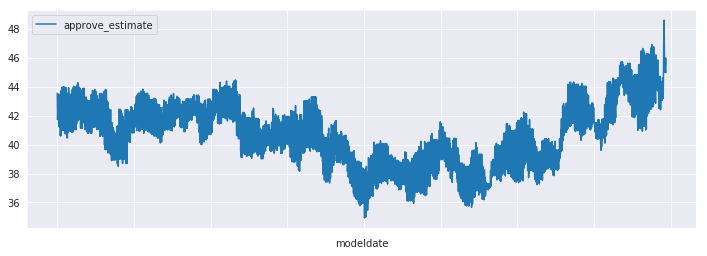

In [31]:
f,ax = plt.subplots(1,1,figsize=(12,4))
topline.plot.line(x='modeldate',y='approve_estimate',ax=ax)

In [30]:
rating.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,11/16/2018,1/20/2017,1/22/2017,Morning Consult,B-,1992.0,rv,0.946437,0.0,46.0,37.0,42.95969,39.20849,NaN,NaN,http://www.politico.com/story/2017/01/poll-vot...,49249,77261,1/23/2017,17:44:57 16 Nov 2018
1,Donald Trump,All polls,11/16/2018,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.245429,0.0,45.0,45.0,46.08260,43.28871,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,17:44:57 16 Nov 2018
2,Donald Trump,All polls,11/16/2018,1/20/2017,1/24/2017,Ipsos,B+,1632.0,a,0.224456,0.0,42.1,45.2,42.52667,44.05646,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,17:44:57 16 Nov 2018
3,Donald Trump,All polls,11/16/2018,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.226788,0.0,45.0,46.0,46.08260,44.28871,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,17:44:57 16 Nov 2018
4,Donald Trump,All polls,11/16/2018,1/20/2017,1/25/2017,Quinnipiac University,A-,1190.0,rv,1.644662,0.0,36.0,44.0,37.71518,42.59451,NaN,NaN,https://poll.qu.edu/national/release-detail?Re...,49260,77272,1/26/2017,17:44:57 16 Nov 2018


In [ ]:
trump_tweets_df.groupby('date').agg({'sentiment':np.mean})['sentiment']